In [1]:
from biss import BissClassifier, save_prediction
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

1 Physical GPUs, 1 Logical GPUs


In [2]:
basepath = 'C:/Users/Martin Weigl/Downloads/biss_data'
biss = BissClassifier(basepath)

In [26]:
preds = biss.predict(cv=True)

Processing image: KO_8742
-----------------------------
Number patches stored: 350

Processing image: KO_8745
-----------------------------
Number patches stored: 350

Processing image: KO_9156
-----------------------------
Number patches stored: 280

Processing image: KO_9158
-----------------------------
Number patches stored: 350

Processing image: WT_8592
-----------------------------
Number patches stored: 350

Processing image: WT_8741
-----------------------------
Number patches stored: 350

Processing image: WT_9155
-----------------------------
Number patches stored: 350

Processing image: WT_9157
-----------------------------
Number patches stored: 490

Getting prediction for all patches ...
Predicting target 1/8: KO_8742
Predicting target 2/8: KO_8745
Predicting target 3/8: KO_9156
Predicting target 4/8: KO_9158
Predicting target 5/8: WT_8592
Predicting target 6/8: WT_8741
Predicting target 7/8: WT_9155
Predicting target 8/8: WT_9157


In [27]:
def compute_dice_coefficient(y_true, y_pred):
    volume_sum = y_true.sum() + y_pred.sum()
    if volume_sum == 0:
        return np.NaN
    volume_intersect = (y_true & y_pred).sum()
    return 2*volume_intersect / volume_sum

In [28]:
preds.keys()

dict_keys(['KO_8742', 'KO_8745', 'KO_9156', 'KO_9158', 'WT_8592', 'WT_8741', 'WT_9155', 'WT_9157'])

In [23]:
from sklearn.metrics import recall_score

In [42]:
thresh = 0.43
sum_dice_score = 0
for k,pred in preds.items():
    
    vessels = io.imread('%s\\test\\raw\\vessels\\%s_vessels.tif' %(basepath,k))
    brainmask = io.imread('%s\\test\\raw\\brainmasks\\%s_brain.tif' %(basepath,k))
    vessels *= brainmask
    
    dice_score = compute_dice_coefficient(vessels,pred>thresh)
    sum_dice_score += dice_score

    print("%s --> Dice Coefficient = %s" % (k,dice_score))
    print("Recall: %s" %recall_score(vessels.flatten(),(pred>thresh).flatten()))

print(sum_dice_score/len(preds))

KO_8742 --> Dice Coefficient = 0.7002471628039391
Recall: 0.8009858195920543
KO_8745 --> Dice Coefficient = 0.5509635121472994
Recall: 0.43684415079673533
KO_9156 --> Dice Coefficient = 0.6282506546145844
Recall: 0.6084132277337779
KO_9158 --> Dice Coefficient = 0.6522817746495125
Recall: 0.6220290492957746
WT_8592 --> Dice Coefficient = 0.5827491706332035
Recall: 0.6298836955504973
WT_8741 --> Dice Coefficient = 0.7356097999415778
Recall: 0.7753252494631805
WT_9155 --> Dice Coefficient = 0.6329675328367544
Recall: 0.6084390030607784
WT_9157 --> Dice Coefficient = 0.6412874468746761
Recall: 0.6373564106526555
0.6405446318126934


### Plot results

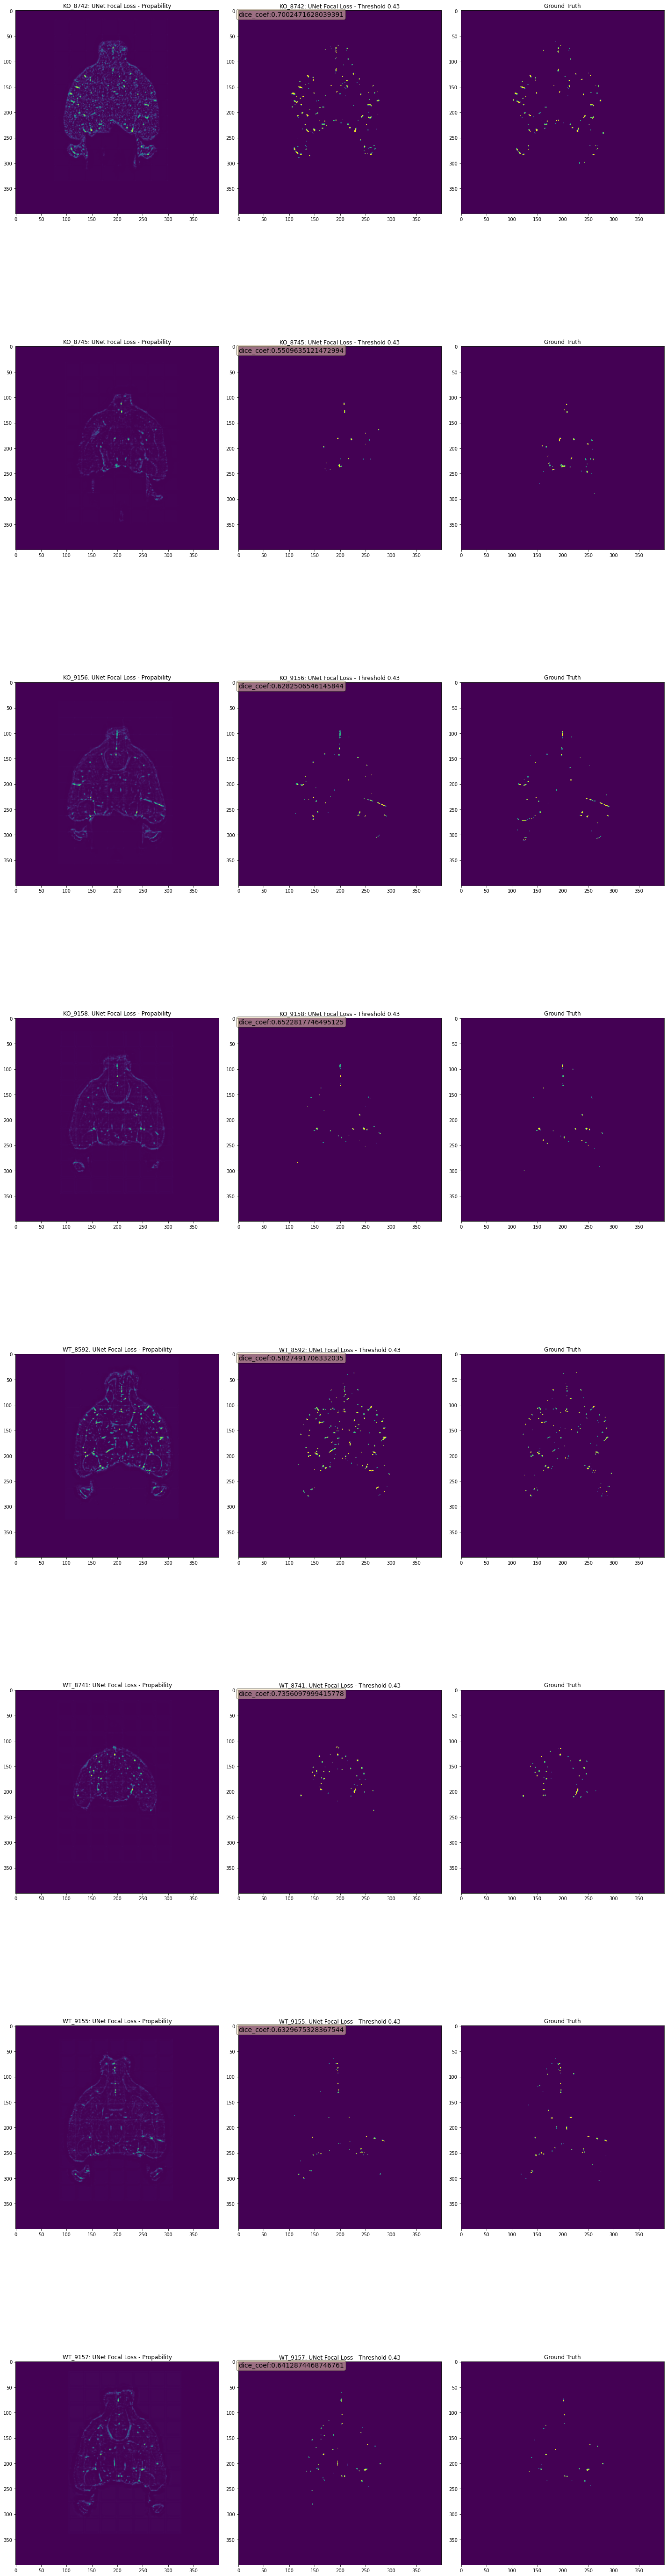

In [62]:
slice = 200
thresh = 0.43
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig, axs = plt.subplots(len(preds), 3, figsize=(20,10*len(preds)))
fig.tight_layout()
i = 0


for k,pred in preds.items():
    
    vessels = io.imread('%s\\test\\raw\\vessels\\%s_vessels.tif' %(basepath,k))
    brainmask = io.imread('%s\\test\\raw\\brainmasks\\%s_brain.tif' %(basepath,k))
    vessels *= brainmask

    textstr = ("dice_coef:%s" % compute_dice_coefficient(vessels,pred>thresh))
    
    axs[i][0].title.set_text('%s: UNet Focal Loss - Propability' %k)
    axs[i][0].imshow(pred[slice])
    axs[i][1].title.set_text('%s: UNet Focal Loss - Threshold %s' %(k,round(thresh,2)))
    axs[i][1].imshow(pred[slice]>thresh)
    axs[i][1].text(0.05, 0.95, textstr, fontsize=14,verticalalignment='top', bbox=props)
    axs[i][2].title.set_text('Ground Truth')
    axs[i][2].imshow(vessels[slice])
    i += 1

In [7]:
save_prediction(basepath+'/pred.tiff', pred)
save_prediction(basepath+'/pred_bin.tiff', pred, threshold=0.45)

C:\Users\Martin Weigl\anaconda3\envs\tf-gpu\lib\site-packages\biss\utils.py:260: UserWarning: C:/Users/Martin Weigl/Downloads/biss_data/pred_bin.tiff is a low contrast image
  io.imsave(path,pred_out,plugin='tifffile')
